In [1]:
import numpy as np
from SimuQ.thesis.Experiment.utilities.hamiltonian_models import Ising

In [2]:
N = 4
T = 1

### Ising chain model creation

In [3]:
h = np.array([1 for j in range(N)])
J_chain = np.zeros((N, N))
for j in range(N - 1):
    J_chain[j, j + 1] = 1

J_cycle = np.copy(J_chain)
J_cycle[0, N - 1] = 1

Ising_chain = Ising(N, T, J_chain, h)

### Initialization step

In [4]:
from qiskit_ibm_provider import IBMProvider
from simuq.provider import BaseProvider
from simuq.solver import generate_as

In [5]:
#Init parameters of the IBMProvider
qs = Ising_chain
hub = "ibm-q-ncsu"
group = "nc-state"
project = "quantum-compiler"
api_file = "../ibm_API_key"
aais = 'heisenberg'
backend = 'ibmq_mumbai'
tol = 0.01
trotter_num = 6
verbose = 0
use_pulse = True
state_prep = None

In [6]:
#Init functionality of the IBMProvider
from qiskit import IBMQ
with open(api_file, "r") as f:
        api_key = f.readline().strip()

provider = IBMQ.enable_account(api_key, hub='ibm-q-ncsu', group='nc-state', project='quantum-compiler')

C:\Users\Admin\AppData\Local\Temp\ipykernel_25576\1520441117.py:6: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.enable_account(api_key, hub='ibm-q-ncsu', group='nc-state', project='quantum-compiler')
C:\Users\Admin\AppData\Local\Temp\ipykernel_25576\1520441117.py:6: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.enable_account(api_key, h

### Compilation step

In [7]:
backend = provider.get_backend(backend)
nsite = backend.configuration().n_qubits

if qs.num_sites > nsite:
    raise Exception("Device has less sites than the target quantum system.")

if aais == "heisenberg":
    from simuq.aais import ibm
    from qiskit_pulse_ibm import transpile

    mach = ibm.generate_qmachine(backend)
    comp = transpile

In [8]:
layout, sol_gvars, boxes, edges = generate_as(
    qs,
    mach,
    trotter_num,
    solver="least_squares",
    solver_args={"tol": tol},
    override_layout=None,
    verbose=verbose,
)

In [9]:
circ = []

for i in range(6):
    circ.append(comp(
        backend,
        layout,
        sol_gvars,
        boxes,
        edges,
        use_pulse=True,
        noise_factor=i
    ))

In [45]:
circ[5].count_ops()

OrderedDict([('rz', 528),
             ('h', 396),
             ('rx', 264),
             ('rzx', 198),
             ('measure', 27),
             ('barrier', 1)])

In [51]:
circ[5].depth()

595

In [55]:
circ[0].calibrations

{'rzx': {((3, 2),
   (0.33333333402942117,)): ScheduleBlock(ScheduleBlock(ScheduleBlock(Play(GaussianSquare(duration=256, sigma=64, width=0, amp=0.19582746565882173, angle=0.2512715211673603), ControlChannel(6)), name="rescale_cr_inst", transform=AlignLeft()), ScheduleBlock(Play(GaussianSquare(duration=256, sigma=64, width=0, amp=0.033952943376134685, angle=-0.0357733676092752), DriveChannel(2)), name="rescale_cr_inst", transform=AlignLeft()), name="block1", transform=AlignLeft()), ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=-0.8297042628366826, amp=0.16244388739127907, angle=0.0, name='Xp_d3'), DriveChannel(3), name='Xp_d3'), name="x", transform=AlignLeft()), ScheduleBlock(ScheduleBlock(Play(GaussianSquare(duration=256, sigma=64, width=0, amp=0.19582746565882173, angle=-2.890321132422433), ControlChannel(6)), name="rescale_cr_inst", transform=AlignLeft()), ScheduleBlock(Play(GaussianSquare(duration=256, sigma=64, width=0, amp=0.033952943376134685, angle=3.105819285980518), Dr

In [34]:
from qiskit import transpile as transpile_qiskit
transpiled_circ = []

for i in range(len(circ)):
    transpiled_circ.append(transpile_qiskit(circ[i],backend))

In [17]:
transpiled_circ[5].count_ops()

OrderedDict([('rzx', 198),
             ('rz', 53),
             ('sx', 30),
             ('measure', 27),
             ('barrier', 1)])

In [29]:
transpiled_circ[5].depth()

170

In [56]:
transpiled_circ[0].calibrations

{'rzx': {((3, 2),
   (0.33333333402942117,)): ScheduleBlock(ScheduleBlock(ScheduleBlock(Play(GaussianSquare(duration=256, sigma=64, width=0, amp=0.19582746565882173, angle=0.2512715211673603), ControlChannel(6)), name="rescale_cr_inst", transform=AlignLeft()), ScheduleBlock(Play(GaussianSquare(duration=256, sigma=64, width=0, amp=0.033952943376134685, angle=-0.0357733676092752), DriveChannel(2)), name="rescale_cr_inst", transform=AlignLeft()), name="block1", transform=AlignLeft()), ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=-0.8297042628366826, amp=0.16244388739127907, angle=0.0, name='Xp_d3'), DriveChannel(3), name='Xp_d3'), name="x", transform=AlignLeft()), ScheduleBlock(ScheduleBlock(Play(GaussianSquare(duration=256, sigma=64, width=0, amp=0.19582746565882173, angle=-2.890321132422433), ControlChannel(6)), name="rescale_cr_inst", transform=AlignLeft()), ScheduleBlock(Play(GaussianSquare(duration=256, sigma=64, width=0, amp=0.033952943376134685, angle=3.105819285980518), Dr

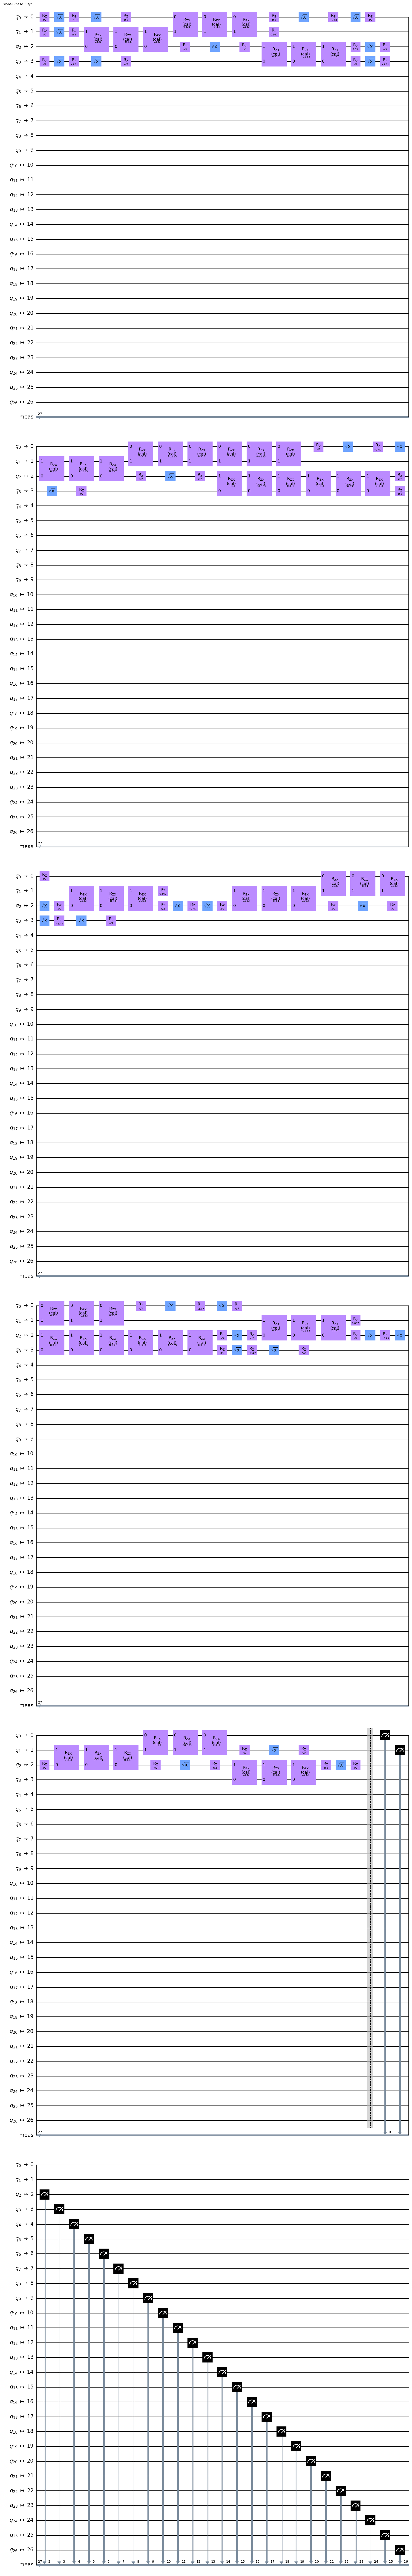

In [38]:
transpiled_circ[1].draw('mpl')

In [11]:
from qiskit import execute
for i in range(len(transpiled_circ)):
    job = execute([transpiled_circ[i]] * 5, shots=1024, backend=backend)
    print(job.job_id())

cna1br7m2pvg008skvh0
cna1bsf1m2c0008wyq80
cna1btq8ff30008rjja0
cna1bvz1m2c0008wyq90
cna1bwz8ff30008rjjag
cna1bxz8ff30008rjjb0
